In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/toothbrush/'



In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # resize as needed
    transforms.ToTensor()
])

dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

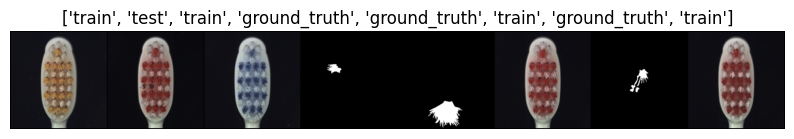

In [5]:
dataiter = iter(dataloader)
images, labels = next(dataiter)

img_grid = torchvision.utils.make_grid(images[:8])
plt.figure(figsize=(10,5))
plt.imshow(img_grid.permute(1, 2, 0))
plt.title([dataset.classes[i] for i in labels[:8]])
plt.axis('off')
plt.show()

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import torch
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Image preprocessing
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

# Define the correct path
train_dir = '/content/drive/MyDrive/toothbrush/train'
test_dir = '/content/drive/MyDrive/toothbrush/test'

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

test_dataset = ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Get class names
class_names = test_dataset.classes

print(class_names)
print(len(train_dataset), len(test_dataset))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['defective', 'good']
60 42


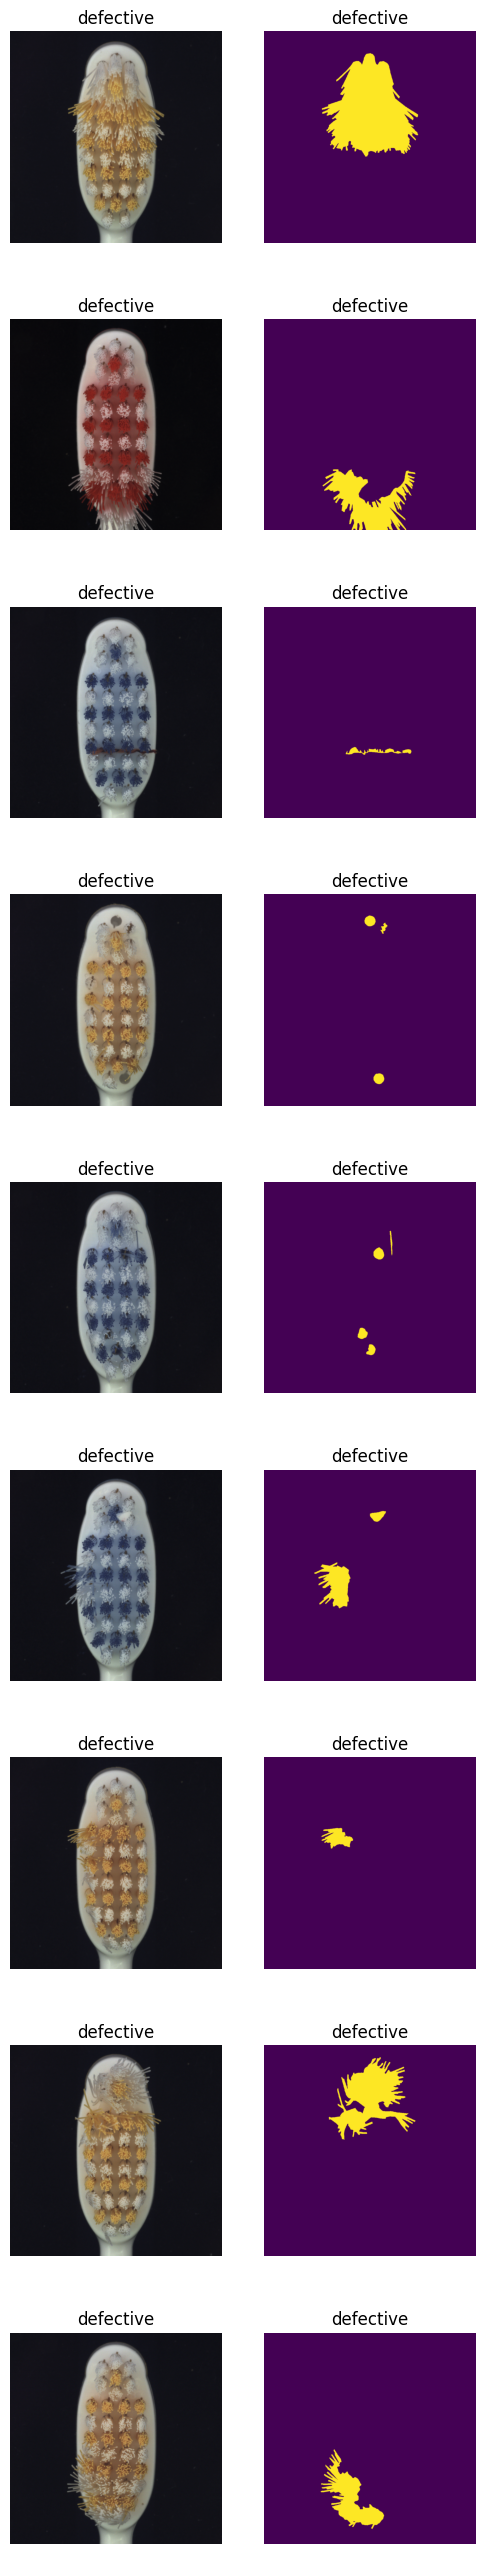

In [7]:
paths=[]
for dirname, _, filenames in os.walk('/content/drive/MyDrive/toothbrush/test'):
    for filename in filenames:
        if dirname.split('/')[-1]!='good':
            paths+=[(os.path.join(dirname, filename))]
paths=random.sample(paths,9)

dir0='/content/drive/MyDrive/toothbrush/ground_truth'

fig, axs = plt.subplots(9,2,figsize=(6,33))
for i in range(9):
    r=i

    path=paths[i]
    img = plt.imread(path)
    label=path.split('/')[-2]
    ax=axs[r][0].axis("off")
    ax=axs[r][0].set_title(label)
    ax=axs[r][0].imshow(img)

    path=paths[i]
    file=path.split('/')[-1].split('.')[0]+'_mask.png'
    label=path.split('/')[-2]
    path2=os.path.join(dir0,label,file)
    img = plt.imread(path2)
    ax=axs[r][1].axis("off")
    ax=axs[r][1].set_title(label)
    ax=axs[r][1].imshow(img)

plt.show()

In [8]:
# Autoencoder
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(8, 4, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(4, 8, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [9]:
# Instantiate Autoencoder and send to GPU
autoencoder = Autoencoder().to(device)

# Definition of loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

In [10]:
# training
for epoch in range(100):
    running_loss = 0.0
    for data in train_loader:
        img, _ = data
        img = Variable(img).to(device)
        optimizer.zero_grad()
        outputs = autoencoder(img)
        loss = criterion(outputs, img)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print('Epoch [%d], Loss: %.4f' % (epoch+1, running_loss/len(train_loader)))

Epoch [1], Loss: 0.0675
Epoch [2], Loss: 0.0660
Epoch [3], Loss: 0.0649
Epoch [4], Loss: 0.0636
Epoch [5], Loss: 0.0618
Epoch [6], Loss: 0.0599
Epoch [7], Loss: 0.0574
Epoch [8], Loss: 0.0527
Epoch [9], Loss: 0.0475
Epoch [10], Loss: 0.0449
Epoch [11], Loss: 0.0411
Epoch [12], Loss: 0.0384
Epoch [13], Loss: 0.0359
Epoch [14], Loss: 0.0332
Epoch [15], Loss: 0.0300
Epoch [16], Loss: 0.0264
Epoch [17], Loss: 0.0227
Epoch [18], Loss: 0.0196
Epoch [19], Loss: 0.0178
Epoch [20], Loss: 0.0166
Epoch [21], Loss: 0.0158
Epoch [22], Loss: 0.0149
Epoch [23], Loss: 0.0142
Epoch [24], Loss: 0.0137
Epoch [25], Loss: 0.0132
Epoch [26], Loss: 0.0129
Epoch [27], Loss: 0.0126
Epoch [28], Loss: 0.0124
Epoch [29], Loss: 0.0123
Epoch [30], Loss: 0.0121
Epoch [31], Loss: 0.0120
Epoch [32], Loss: 0.0119
Epoch [33], Loss: 0.0118
Epoch [34], Loss: 0.0117
Epoch [35], Loss: 0.0116
Epoch [36], Loss: 0.0116
Epoch [37], Loss: 0.0115
Epoch [38], Loss: 0.0115
Epoch [39], Loss: 0.0113
Epoch [40], Loss: 0.0113
Epoch [41

In [11]:
# test
from sklearn.metrics import classification_report
autoencoder.eval()

for criteria in [0.001,0.003,0.01,0.03,0.1]:
    y_pred=[]
    y_true=[]
    test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            img, label = data
            img = Variable(img).to(device)
            outputs = autoencoder(img)
            loss = criterion(outputs, img)
            test_loss += loss.item()
            for i in range(len(img)):
                lossi=criterion(outputs[i], img[i])
                y_pred+=[int(lossi.item()>criteria)] #ture(big loss)=1,false(smsll loss)=0
                y_true+=[int(label[i]>0)] #ture(not notmal)=1,false(normal)=0
    print('test_loss',test_loss)
    print('criteria: lossi.item()>',criteria)
    print(classification_report(y_true, y_pred, target_names=['Normal','Abnormal'], digits=4))

test_loss 0.02952374704182148
criteria: lossi.item()> 0.001
              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000        30
    Abnormal     0.2857    1.0000    0.4444        12

    accuracy                         0.2857        42
   macro avg     0.1429    0.5000    0.2222        42
weighted avg     0.0816    0.2857    0.1270        42



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_loss 0.02952374704182148
criteria: lossi.item()> 0.003
              precision    recall  f1-score   support

      Normal     0.0000    0.0000    0.0000        30
    Abnormal     0.2857    1.0000    0.4444        12

    accuracy                         0.2857        42
   macro avg     0.1429    0.5000    0.2222        42
weighted avg     0.0816    0.2857    0.1270        42



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_loss 0.02952374704182148
criteria: lossi.item()> 0.01
              precision    recall  f1-score   support

      Normal     0.7500    0.4000    0.5217        30
    Abnormal     0.3077    0.6667    0.4211        12

    accuracy                         0.4762        42
   macro avg     0.5288    0.5333    0.4714        42
weighted avg     0.6236    0.4762    0.4930        42

test_loss 0.02952374704182148
criteria: lossi.item()> 0.03
              precision    recall  f1-score   support

      Normal     0.7143    1.0000    0.8333        30
    Abnormal     0.0000    0.0000    0.0000        12

    accuracy                         0.7143        42
   macro avg     0.3571    0.5000    0.4167        42
weighted avg     0.5102    0.7143    0.5952        42



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


test_loss 0.02952374704182148
criteria: lossi.item()> 0.1
              precision    recall  f1-score   support

      Normal     0.7143    1.0000    0.8333        30
    Abnormal     0.0000    0.0000    0.0000        12

    accuracy                         0.7143        42
   macro avg     0.3571    0.5000    0.4167        42
weighted avg     0.5102    0.7143    0.5952        42



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
#### comparison bertween classes in test data
autoencoder.eval()
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)
class_encodings = [[] for i in range(2)]
with torch.no_grad():
    for data in test_loader:
        img, label = data
        img = Variable(img).to(device)
        encoding = autoencoder.encoder(img)
        class_encodings[label.item()].append(encoding.cpu().numpy().ravel())

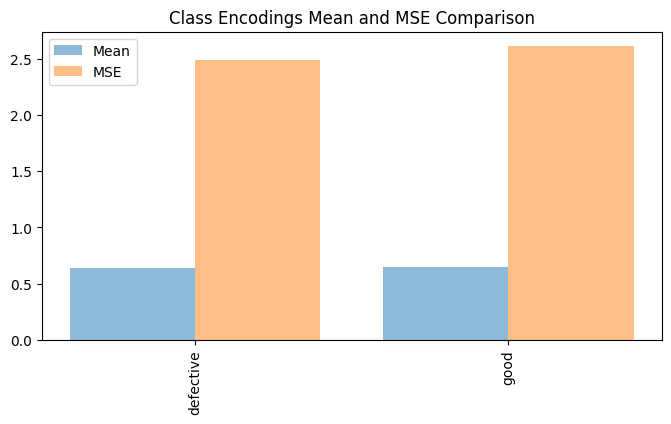

In [13]:
class_means = []
class_mses = []
for i in range(2):
    class_means.append(np.mean(class_encodings[i]))
    class_mse = np.mean((class_encodings[i] - class_means[i])**2)
    class_mses.append(class_mse)

plt.figure(figsize=(8,4))
plt.bar(np.arange(2)-0.2, class_means, width=0.4, label='Mean', alpha=0.5)
plt.bar(np.arange(2)+0.2, class_mses, width=0.4, label='MSE', alpha=0.5)
plt.xticks(range(2), class_names, rotation=90)
plt.legend()
plt.title("Class Encodings Mean and MSE Comparison")
plt.show()